# Metin Görselleştirme

In [1]:
import pandas as pd

import nltk

from nltk.corpus import stopwords

import textblob

from textblob import TextBlob

from nltk.stem import PorterStemmer

from textblob import Word

from nltk import word_tokenize, pos_tag, ne_chunk


nltk.download("averaged_perceptron_tagger")

sw = stopwords.words("english")

nltk.download('maxent_ne_chunker')

nltk.download('words')

nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sefa3\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Sefa3\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Sefa3\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sefa3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
metin = """
A Scandal in Bohemia! 01
The Red-headed League,2
A Case, of Identity 33
The Boscombe Valley Mystery4
The Five Orange Pips1
The Man with? the Twisted Lip
The Adventure of the Blue Carbuncle
The Adventure of the Speckled Band
The Adventure of the Engineer's Thumb
The Adventure of the Noble Bachelor
The Adventure of the Beryl Coronet
The Adventure of the Copper Beeches"""

metin

"\nA Scandal in Bohemia! 01\nThe Red-headed League,2\nA Case, of Identity 33\nThe Boscombe Valley Mystery4\nThe Five Orange Pips1\nThe Man with? the Twisted Lip\nThe Adventure of the Blue Carbuncle\nThe Adventure of the Speckled Band\nThe Adventure of the Engineer's Thumb\nThe Adventure of the Noble Bachelor\nThe Adventure of the Beryl Coronet\nThe Adventure of the Copper Beeches"

------------

# 1. Veri Ön İşleme ve Terim Frekansı

In [3]:
data = pd.read_csv("train.tsv")

data.head()

ParserError: Error tokenizing data. C error: Expected 2 fields in line 83, saw 3


In [4]:
data = pd.read_csv("train.tsv", sep = "\t")

data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [6]:
df = data.copy()

df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [7]:
# Büyük - Küçük Dönüşümü

df["Phrase"] = df["Phrase"].apply(lambda x : " ".join(x.lower() for x in x.split()))

df.Phrase.head()

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
Name: Phrase, dtype: object

In [8]:
# Noktalama İşaretleri

df["Phrase"] = df["Phrase"].str.replace("[^\w\s]", "")

df.Phrase.head(7)

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
5    of escapades demonstrating the adage that what...
6                                                   of
Name: Phrase, dtype: object

In [9]:
# Sayılar

df["Phrase"] = df["Phrase"].str.replace("\d", "")

df.Phrase.head(5)

0    a series of escapades demonstrating the adage ...
1    a series of escapades demonstrating the adage ...
2                                             a series
3                                                    a
4                                               series
Name: Phrase, dtype: object

In [10]:
# Stop Words

df["Phrase"] = df["Phrase"].apply(lambda x : " ".join(x for x in x.split() if x not in sw))

df.Phrase.head()

0    series escapades demonstrating adage good goos...
1      series escapades demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

In [11]:
# Seyreklerin Silinmesi

sil = pd.Series(" ".join(df["Phrase"]).split()).value_counts()[-1000:]

df.Phrase = df.Phrase.apply(lambda x : " ".join(x for x in x.split() if x not in sil))

df.Phrase.head()

0    series demonstrating adage good goose also goo...
1                series demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

In [12]:
sil.shape

(1000,)

In [13]:
df.shape

(156060, 4)

In [14]:
data.shape

(156060, 4)

In [15]:
# lemmatize

df.Phrase = df.Phrase.apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))

df.Phrase.head()

0    series demonstrating adage good goose also goo...
1                series demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

In [16]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [17]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series demonstrating adage good goose also goo...,1
1,2,1,series demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


In [20]:
# tf1 = df.Phrase.apply(lambda x : pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

# tf1 --> BU SATIRLAR YETERLİ BELLEĞE SAHİP OLMADIĞIMDAN ÇALIŞMADI.

# dolayısı ile tf1'in içerisinde ilk 5 kelimeyi dataframe olarak kendim yazmak zorunda kaldım.

tf1 = pd.DataFrame({"words" : ["good", "also", "demonstraining", "occasionally", "gander"],
                   "tf" : [1574.0, 490.0, 11.0, 117.0, 2.0]})

tf1.head()

,words,tf
0,good,1574.0
1,also,490.0
2,demonstraining,11.0
3,occasionally,117.0
4,gander,2.0


---------

## 2. Barplot

In [21]:
a = tf1[tf1["tf"] > 1000]

a.plot.bar(x = "words", y = "tf");

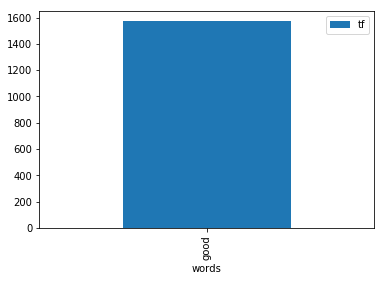

In [23]:
a.plot.bar(x = "words", y = "tf");

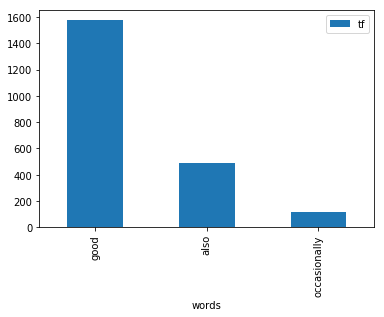

In [24]:
b = tf1[tf1["tf"] > 50]

b.plot.bar(x = "words", y = "tf");

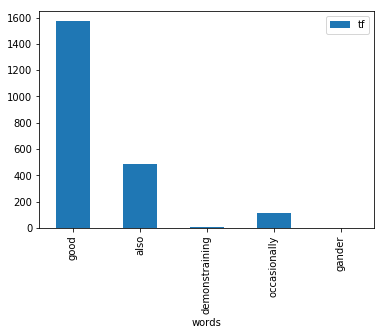

In [25]:
tf1.plot.bar(x = "words", y = "tf");

----------

## 3. Wordcloud

In [26]:
!pip install wordcloud

In [27]:
import numpy as np

import pandas as pd

from os import path

from PIL import Image

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

In [30]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series demonstrating adage good goose also goo...,1
1,2,1,series demonstrating adage good goose,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


In [28]:
text = df["Phrase"][0]

text

'series demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [29]:
wordcloud = WordCloud().generate(text)

wordcloud

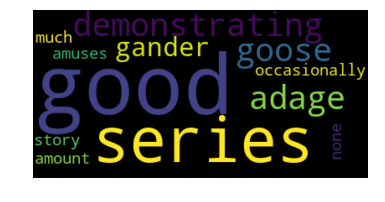

In [32]:
plt.imshow(wordcloud, interpolation = "bilinear")

plt.axis("off")

plt.show();

# buna kelime bulutu denir.

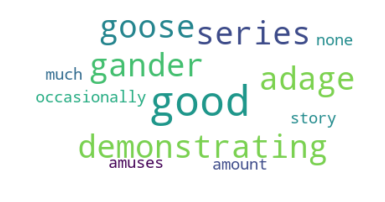

In [33]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)

plt.figure()

plt.imshow(wordcloud, interpolation = "bilinear")

plt.axis("off")

plt.show();

In [34]:
# Kayıt etmek için;

wordcloud.to_file("kelime_bulutu.png");

In [38]:
# tüm metinleri almak için;

text = " ".join(i for i in df.Phrase)

text[0:100]

'series demonstrating adage good goose also good gander occasionally amuses none amount much story se'

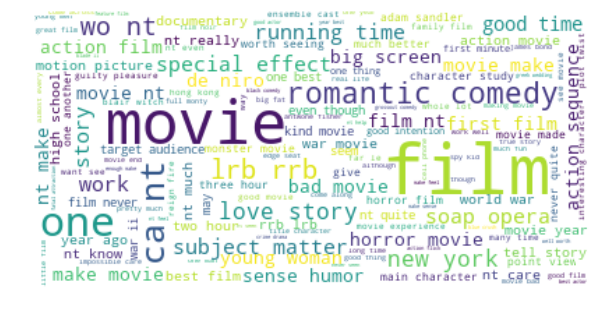

In [40]:
wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)

plt.figure(figsize = [10,10])

plt.imshow(wordcloud, interpolation = "bilinear")

plt.axis("off")

plt.show();

In [41]:
?wordcloud

Type:        WordCloud
String form: <wordcloud.wordcloud.WordCloud object at 0x00000298F0A2BEF0>
File:        c:\users\sefa3\anaconda3\lib\site-packages\wordcloud\wordcloud.py
Docstring:  
Word cloud object for generating and drawing.

Parameters
----------
font_path : string
    Font path to the font that will be used (OTF or TTF).
    Defaults to DroidSansMono path on a Linux machine. If you are on
    another OS or don't have this font, you need to adjust this path.

width : int (default=400)
    Width of the canvas.

height : int (default=200)
    Height of the canvas.

prefer_horizontal : float (default=0.90)
    The ratio of times to try horizontal fitting as opposed to vertical.
    If prefer_horizontal < 1, the algorithm will try rotating the word
    if it doesn't fit. (There is currently no built-in way to get only
    vertical words.)

mask : nd-array or None (default=None)
    If not None, gives a binary mask on where to draw words. If mask is not
    None, width and height

---------------

## 4. Şablonlara göre Word Cloud

In [44]:
vbo_mask = np.array(Image.open("tr.png"))

vbo_mask

array([[[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       ...,

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]],

       [[227,  10,  23],
        [227,  10,  23],
        [227,  10,  23],
        ...,
        [227,  10,  23],
        [227,  10,  23],
        [227,  10,  23]]

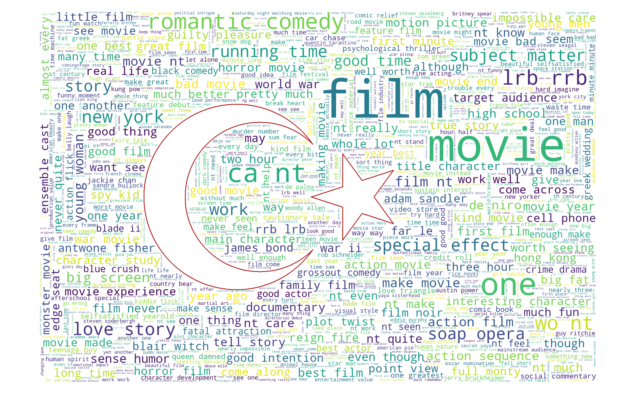

In [45]:
wc = WordCloud(background_color = "white",
                     max_words = 1000, 
                     mask = vbo_mask, # şablonu gireceğimiz yer
                     contour_width = 3,
                     contour_color = "firebrick")

wc.generate(text)

wc.to_file("vbo.png")

plt.figure(figsize = [10,10])

plt.imshow(wc, interpolation = "bilinear")

plt.axis("off")

plt.show();

--------------------